In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Загрузка данных
data = pd.read_csv('AEP.csv')
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'])

# Масштабирование данных
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data['y'].values.reshape(-1, 1))

data




,ds,y
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [7]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((sequence, target))
    return np.array(sequences)

seq_length = 10  # Длина последовательности
sequences = create_sequences(scaled_data, seq_length)

# Разделение на обучающий и тестовый наборы
train_size = int(len(sequences) * 0.7)
test_size = len(sequences) - train_size
train_data, test_data = sequences[:train_size], sequences[train_size:]

# Разделение признаков и целевых значений
def separate_features_targets(data):
    X = np.array([item[0] for item in data])
    y = np.array([item[1] for item in data])
    return X, y

X_train, y_train = separate_features_targets(train_data)
X_test, y_test = separate_features_targets(test_data)

X_train, y_train

C:\Users\srezv\AppData\Local\Temp\ipykernel_15296\1996901719.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sequences)


(array([[[-0.51632121],
         [-0.59240412],
         [-0.62814944],
         ...,
         [-0.41467047],
         [-0.36229366],
         [-0.33473998]],
 
        [[-0.59240412],
         [-0.62814944],
         [-0.63559638],
         ...,
         [-0.36229366],
         [-0.33473998],
         [-0.30457987]],
 
        [[-0.62814944],
         [-0.63559638],
         [-0.61660668],
         ...,
         [-0.33473998],
         [-0.30457987],
         [-0.32630011]],
 
        ...,
 
        [[-0.12312275],
         [-0.07558645],
         [-0.05895495],
         ...,
         [-0.20404617],
         [-0.22266352],
         [-0.31736378]],
 
        [[-0.07558645],
         [-0.05895495],
         [-0.03450416],
         ...,
         [-0.22266352],
         [-0.31736378],
         [-0.44185181]],
 
        [[-0.05895495],
         [-0.03450416],
         [-0.0601961 ],
         ...,
         [-0.31736378],
         [-0.44185181],
         [-0.63311406]]]),
 array([[-0.3045798

In [10]:

# Определение модели LSTM с TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X_train, y_train, epochs=100, batch_size=128)

# Тестирование модели
test_loss = model.evaluate(X_test, y_test)


Epoch 1/100
664/664 [==============================] - 8s 9ms/step - loss: 0.0165
Epoch 2/100
664/664 [==============================] - 6s 9ms/step - loss: 0.0036
Epoch 3/100
664/664 [==============================] - 5s 8ms/step - loss: 0.0035
Epoch 4/100
664/664 [==============================] - 6s 9ms/step - loss: 0.0035
Epoch 5/100
664/664 [==============================] - 6s 9ms/step - loss: 0.0034
Epoch 6/100
664/664 [==============================] - 6s 8ms/step - loss: 0.0034
Epoch 7/100
664/664 [==============================] - 6s 10ms/step - loss: 0.0033
Epoch 8/100
664/664 [==============================] - 7s 10ms/step - loss: 0.0033
Epoch 9/100
664/664 [==============================] - 8s 12ms/step - loss: 0.0032
Epoch 10/100
664/664 [==============================] - 7s 10ms/step - loss: 0.0031
Epoch 11/100
664/664 [==============================] - 9s 13ms/step - loss: 0.0030
Epoch 12/100
664/664 [==============================] - 11s 16ms/step - loss: 0.0028
Epoch 

In [5]:
from tensorflow import keras
model = keras.models.load_model('model_checkpoint.h5')

161/161 [==============================] - 1s 3ms/step


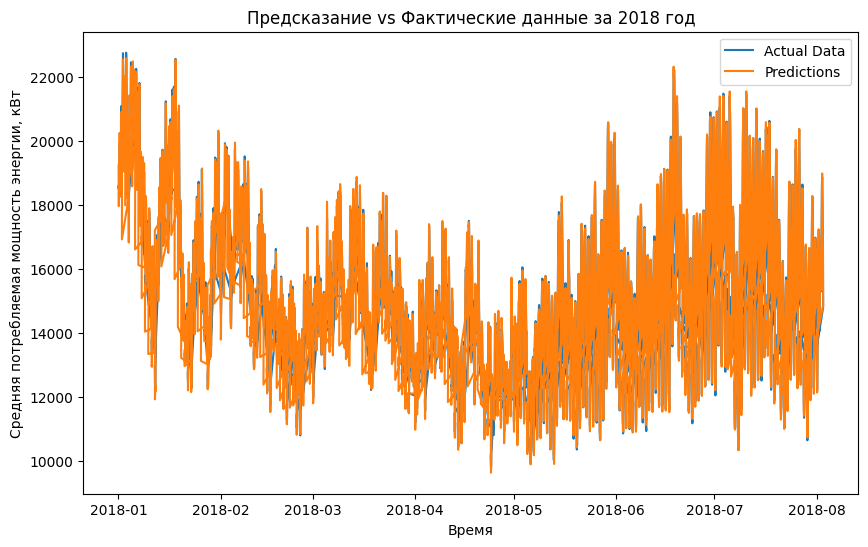

In [6]:
import matplotlib.pyplot as plt

# Функция для подготовки данных для прогнозирования по заданному году
def prepare_data_for_year(data, year, seq_length):
    data_year = data[data['ds'].dt.year == year]['y'].values
    scaled_data_year = scaler.transform(data_year.reshape(-1, 1))
    sequences = []
    for i in range(len(scaled_data_year) - seq_length):
        sequence = scaled_data_year[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)

# Предположим, пользователь ввел год 'input_year' для прогноза
input_year = int(input("Введите год для прогноза: "))
in_base = True
if input_year > 2018:
    in_base = False
    input_year = 2017
# Подготовка данных для прогноза на указанный год
year_seq = prepare_data_for_year(data, input_year, seq_length)

# Получение прогнозов для указанного года
year_predictions = model.predict(year_seq)
year_predictions = scaler.inverse_transform(year_predictions)

# Получение фактических данных для указанного года из датасета
actual_data = data[data['ds'].dt.year == input_year]['y'].values[seq_length:]

# Визуализация прогнозов и фактических данных для указанного года
plt.figure(figsize=(10, 6))
if in_base:
    plt.plot(data[data['ds'].dt.year == input_year]['ds'].values[seq_length:], actual_data, label='Actual Data')
plt.plot(data[data['ds'].dt.year == input_year]['ds'].values[seq_length:], year_predictions, label='Predictions')
plt.xlabel('Время')
plt.ylabel('Средняя потребляемая мощность энергии, кВт')
if in_base:
    plt.title(f'Предсказание vs Фактические данные за {input_year} год')
else: 
    plt.title(f'Прогноз для введенного года ')
plt.legend()
plt.show()


